# Detecting strain variation by looking at high-degree nodes within reads

To generate output:

```
load-graph.py akker-reads.ng akker-reads.abundtrim.gz -M 1e9 -k 31 --no-build-tagset
./measure-reads.py akker-reads.ng ../akker-reads.abundtrim.gz

load-graph.py shew-reads.ng shewanella.abundtrim.gz -M 1e9 -k 31 --no-build-tagset
./measure-reads.py shew-reads.ng ../shewanella.abundtrim.gz 
```

(see [cats-in-practice-pipeline Makefile](https://github.com/spacegraphcats/cats-in-practice-pipeline/blob/master/Makefile) for origin of reads files w/trimming parameters, etc.)

In [1]:
ls

akker-reads.hdn.csv     hdn.ipynb               shew-reads.ng.hdn.csv
akker-reads.ng          measure-reads.py*       shew-reads.ng.info
akker-reads.ng.hdn.csv  shew-reads.hdn.csv
akker-reads.ng.info     shew-reads.ng


In [2]:
!head akker-reads.hdn.csv


hdn_count,n_reads
0,754975
1,118836
2,21060
3,4871
4,1415
5,491
6,206
7,63
8,38


In [3]:
import csv
import numpy

def read_hdn(filename):
    x = []
    with open(filename) as fp:
        r = csv.DictReader(fp)
        for row in r:
            x.append((int(row['hdn_count']), int(row['n_reads'])))
    return numpy.array(x)

In [4]:
akker = read_hdn('akker-reads.hdn.csv')
shew = read_hdn('shew-reads.hdn.csv')

In [5]:
%matplotlib inline
from matplotlib import pyplot

(0.0, 10, 0.0, 800000.0)

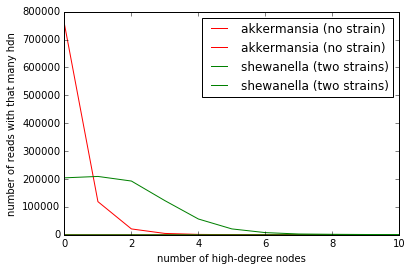

In [6]:
pyplot.plot(akker, 'r-', label='akkermansia (no strain)')
pyplot.plot(shew, 'g-', label='shewanella (two strains)')
pyplot.legend(loc='upper right')
pyplot.xlabel('number of high-degree nodes')
pyplot.ylabel('number of reads with that many hdn')
pyplot.axis(xmax=10)